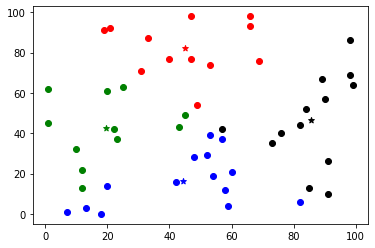

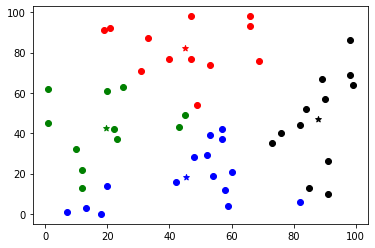

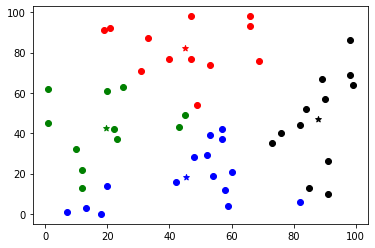

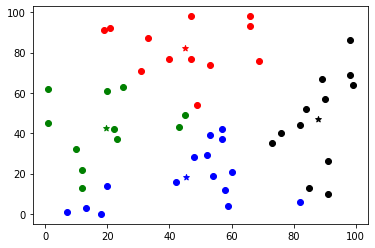

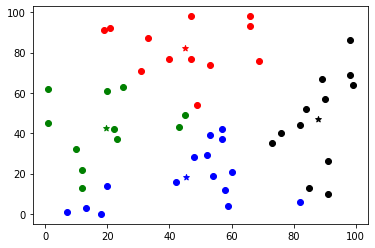

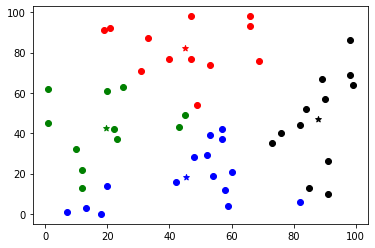

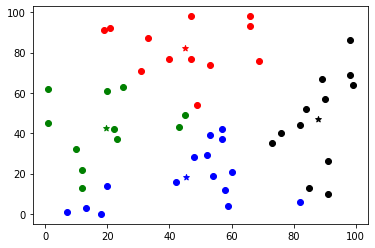

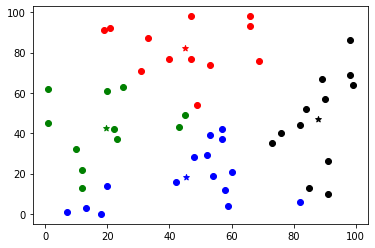

k = 4


In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd


def dist(x1, y1, x2, y2):
    return np.sqrt((x1 - x2) ** 2 + (y1 - y2) ** 2)

def get_centroids(points, k):   
    x_centr = points['x'].mean() 
    y_centr = points['y'].mean()
    R = dist(x_centr, y_centr, points['x'][0], points['y'][0])
    for i in range(len(points)):
        R = max(R, dist(x_centr, y_centr, points['x'][i], points['y'][i]))
    x_c, y_c = [], []
    for i in range(k):
        x_c.append(x_centr + R * np.cos(2 * np.pi * i / k))
        y_c.append(y_centr + R * np.sin(2 * np.pi * i / k))
    return [x_c, y_c]


#получение суммы - в дальнейшем получение среднего значения
def point_sum(points, summed_x, summed_y, count, j):
  summed_x = summed_x +  points['x'][j]
  summed_y = summed_y + points['y'][j]
  count = count + 1 

  return summed_x, summed_y, count    

def mean(sum, count):
  return sum / max(count, 1)

def get_color(nearest_centroid, i, colors):
  return colors[nearest_centroid[i] % len(colors)]

def random_points(n,filename): 
    x = np.random.randint(0, 100, n) 
    y = np.random.randint(0, 100, n) 
    pd.DataFrame([x, y]).to_csv(filename) 
 
def generate_points_file(points_count, filename): 
    x = np.random.randint(0, 100, points_count) 
    y = np.random.randint(0, 100, points_count) 
    with open(filename, 'w') as file: 
        file.write('x,y\n') 
        for item_x, item_y in zip(x, y): 
            file.write(f'{item_x},{item_y}\n') 
 
def read_csv(filename): 
    return pd.read_csv(filename)


def centroids(points, k):
    x_center = points['x'].mean()
    y_center = points['y'].mean()
    R = dist(x_center, y_center, points['x'][0], points['y'][0])
    for i in range(len(points)):
        R = max(R, dist(x_center, y_center, points['x'][i], points['y'][i]))
    x_c, y_c = [], []
    for i in range(k):
        x_c.append(x_center + R * np.cos(2 * np.pi * i / k))
        y_c.append(y_center + R * np.sin(2 * np.pi * i / k))
    return [x_c, y_c]


                      
#определение какой из центроидов ближе к точке
#centroids[0] - список координат Х, centroids[1] - У
def nearest_centroid(points, centroids):
    clust = []
    for i in range(len(points['x'])):
      r = np.inf #бесконечность
      cl = 0
      for j in range(len(centroids[0])):
          dst = dist(points['x'][i], points['y'][i], centroids[0][j], centroids[1][j])
          if dst < r:
              cl = j
              r = dst
      clust.append(cl)
    return clust


#от итерации к итерации меняется значение координат центроидов, после определения к каким центроидам относятся точки на этой итерации
#для следующей итерации координаты центроидов меняются и становятся равным среднему координат принадлежащих к ним точек    
def get_new_centroids(points, nearest, centroids):
    clust = [[], []]
    for i in range(len(centroids[0])):
        summed_x = 0
        summed_y = 0
        count = 0
        for j in range(len(points['x'])):
            if (nearest[j] == i):
                summed_x, summed_y, count = point_sum(points, summed_x, summed_y, count, j)     
        if count > 0 :         
          clust[0].append(mean(summed_x, count))
          clust[1].append(mean(summed_y, count))
    return clust

def algoritm(points, k, risovat):
    colors = ['black', 'red', 'green', 'blue', 'pink']
    centroids = get_centroids(points, k)
    nearest = nearest_centroid(points, centroids)
    old_centroids = centroids
    centroids = get_new_centroids(points, nearest, centroids)
    for j in range(len(old_centroids)):
        for i in range(len(old_centroids[j])):
            if old_centroids[j][i] != centroids[j][i]:
                if risovat == True:
                  for i in range(len(points['x'])):
                    point_color = get_color(nearest, i, colors)
                    plt.scatter(points['x'][i], points['y'][i], color = point_color)
                  for i in range(k):
                    plt.scatter(centroids[0][i], centroids[1][i], marker='*', color=colors[i % len(colors)])
                  plt.show()
            nearest = nearest_centroid(points, centroids)
            old_cents = centroids
            centroids = get_new_centroids(points, nearest, centroids)
    return nearest, centroids

def criterion(points, centroid, nearest):
    result = 0
    for i in range(len(points['x'])):
        x_diff = (points['x'][i] - centroid[0][nearest[i]]) ** 2
        y_diff = (points['y'][i] - centroid[1][nearest[i]]) ** 2
        result = result + x_diff + y_diff
    return result

def get_old_cri(points, k) :
  nci, cents = algoritm(points, k, False)
  return criterion(points, cents, nci)

def get_cri(points, k) :
  nci, cents = algoritm(points, k, False)
  return criterion(points, cents, nci)

def get_new_cri(points, k) :
  nci, cents = algoritm(points, k, False)
  return criterion(points, cents, nci)

def get_d(new, old, cur):
  return ((cur - new) / (old - cur))

def get_k(points):
    k = 1
    max_k = 10
    min_d = 0.3
    old_criterion = get_old_cri(points, k)
    k += 1
    criterion_current = get_cri(points, k)
    k += 1
    new_criterion = get_new_cri(points, k)
    d = get_d(new_criterion, old_criterion, criterion_current)
    while d > min_d and k < max_k:
        k += 1
        nci, cents = algoritm(points, k, False)
        old_criterion = criterion_current
        criterion_current = new_criterion
        new_cri = criterion(points, cents, nci)
        d = get_d(new_criterion, old_criterion, criterion_current)
    return k

if __name__ == '__main__':
    n = 50 #кол-во тчк 
    k = 4 #кол-во кластеров 
    filename = 'dataset.csv' 
    generate_points_file(n, filename) 
    points = read_csv(filename)
    algoritm(points, k, True)
    k = get_k(points)
  
    print('k = ' +  str(k))